In [2]:
!pip install csv
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
# import matplotlib.pyplot as plt
ts = TimeSeries(key='B53N03ODVZVOH8R3',output_format='pandas')

In [4]:
TSN_data, metadata=ts.get_daily('TSN',outputsize='full')
TSN_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5224.000000,5224.000000,5224.000000,5224.000000,5.224000e+03
mean,29.932584,30.283338,29.582189,29.938243,3.066887e+06
std,22.826175,23.035699,22.610885,22.817368,2.436858e+06
min,4.610000,5.010000,4.400000,4.400000,6.450000e+04
25%,13.860000,14.060000,13.650000,13.880000,1.448100e+06
50%,18.050000,18.255000,17.860000,18.065000,2.614724e+06
75%,42.350000,42.731250,41.865000,42.355000,4.022450e+06
max,93.490000,94.240000,92.370000,93.460000,3.504480e+07


In [5]:
TSN_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-08-05,64.45,64.835,62.70,62.93,4045921.0
2020-08-04,63.10,65.130,62.52,65.12,5641165.0
2020-08-03,62.90,63.470,61.34,62.43,5173724.0
2020-07-31,61.39,61.790,60.61,61.45,2040654.0
2020-07-30,61.33,61.640,60.30,61.57,1493069.0
...,...,...,...,...,...
1999-11-05,16.38,16.750,16.38,16.69,254600.0
1999-11-04,16.38,16.500,16.25,16.38,205000.0
1999-11-03,15.94,16.380,15.94,16.25,203900.0


In [47]:
dates = []
prices = []
last_month = TSN_data[:30]
last_month

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-08-05,64.45,64.835,62.7000,62.93,4045921.0
2020-08-04,63.10,65.130,62.5200,65.12,5641165.0
2020-08-03,62.90,63.470,61.3400,62.43,5173724.0
2020-07-31,61.39,61.790,60.6100,61.45,2040654.0
2020-07-30,61.33,61.640,60.3000,61.57,1493069.0
2020-07-29,61.12,62.000,60.3400,62.00,1554863.0
2020-07-28,60.55,61.320,60.3700,60.74,1255446.0
2020-07-27,60.56,61.060,59.9600,60.98,1108204.0
2020-07-24,60.93,61.530,60.3600,60.82,1194455.0


In [10]:
last_month.reset_index(inplace=True)
last_month


,date,1. open,2. high,3. low,4. close,5. volume
0,2020-08-05,64.45,64.835,62.7000,62.93,4045921.0
1,2020-08-04,63.10,65.130,62.5200,65.12,5641165.0
2,2020-08-03,62.90,63.470,61.3400,62.43,5173724.0
3,2020-07-31,61.39,61.790,60.6100,61.45,2040654.0
4,2020-07-30,61.33,61.640,60.3000,61.57,1493069.0
5,2020-07-29,61.12,62.000,60.3400,62.00,1554863.0
6,2020-07-28,60.55,61.320,60.3700,60.74,1255446.0
7,2020-07-27,60.56,61.060,59.9600,60.98,1108204.0
8,2020-07-24,60.93,61.530,60.3600,60.82,1194455.0
9,2020-07-23,60.35,61.660,60.3100,60.91,1476770.0


In [23]:
lm_opening = last_month.rename(columns={'date':'','1. open':'','2. high':'','3. low':'','4. close':'','5. volume':''})
lm_opening

,,,,,,
0,2020-08-05,64.45,64.835,62.7000,62.93,4045921.0
1,2020-08-04,63.10,65.130,62.5200,65.12,5641165.0
2,2020-08-03,62.90,63.470,61.3400,62.43,5173724.0
3,2020-07-31,61.39,61.790,60.6100,61.45,2040654.0
4,2020-07-30,61.33,61.640,60.3000,61.57,1493069.0
5,2020-07-29,61.12,62.000,60.3400,62.00,1554863.0
6,2020-07-28,60.55,61.320,60.3700,60.74,1255446.0
7,2020-07-27,60.56,61.060,59.9600,60.98,1108204.0
8,2020-07-24,60.93,61.530,60.3600,60.82,1194455.0
9,2020-07-23,60.35,61.660,60.3100,60.91,1476770.0


In [49]:
for row in lm_opening.itertuples():
#     print(row)
#     print(str(row[1]).split('-')[2].split(' ')[0])
    dates.append(int(str(row[1]).split('-')[2].split(' ')[0]))
    prices.append(float(row[2]))
#     print(row[0])
dates

[5,
 4,
 3,
 31,
 30,
 29,
 28,
 27,
 24,
 23,
 22,
 21,
 20,
 17,
 16,
 15,
 14,
 13,
 10,
 9,
 8,
 7,
 6,
 2,
 1,
 30,
 29,
 26,
 25,
 24]

In [50]:
dates = np.reshape(dates,(len(dates), 1))
dates

array([[ 5],
       [ 4],
       [ 3],
       [31],
       [30],
       [29],
       [28],
       [27],
       [24],
       [23],
       [22],
       [21],
       [20],
       [17],
       [16],
       [15],
       [14],
       [13],
       [10],
       [ 9],
       [ 8],
       [ 7],
       [ 6],
       [ 2],
       [ 1],
       [30],
       [29],
       [26],
       [25],
       [24]])

In [60]:
dates = range(1,31)
ndates = []
for date in dates:
    ndate = 31-date
    ndates.append(ndate)
ndates = np.reshape(ndates,(len(ndates), 1))
ndates

array([[30],
       [29],
       [28],
       [27],
       [26],
       [25],
       [24],
       [23],
       [22],
       [21],
       [20],
       [19],
       [18],
       [17],
       [16],
       [15],
       [14],
       [13],
       [12],
       [11],
       [10],
       [ 9],
       [ 8],
       [ 7],
       [ 6],
       [ 5],
       [ 4],
       [ 3],
       [ 2],
       [ 1]])

In [61]:
from sklearn.svm import SVR

svr_lin = SVR(kernel= 'linear', C=1e3)
svr_poly = SVR(kernel= 'poly', C=1e3, degree = 2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin.fit(ndates,prices)
svr_poly.fit(ndates,prices)
svr_rbf.fit(ndates,prices)


SVR(C=1000.0, gamma=0.1)

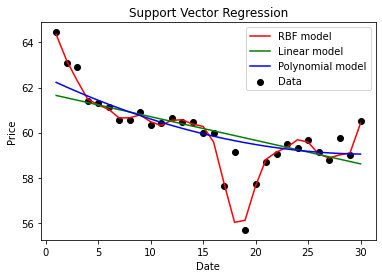

In [62]:
plt.scatter(dates,prices,color='black',label='Data')
plt.plot(dates,svr_rbf.predict(ndates),color='red',label='RBF model')
plt.plot(dates,svr_lin.predict(ndates),color='green',label='Linear model')
plt.plot(dates,svr_poly.predict(ndates),color='blue',label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [82]:
# print(svr_rbf.predict(29)[0] + svr_lin.predict(29)[0] + svr_poly.predict(29)[0])
# arr = [29]
# arr.reshape(-1, 1)
svr_rbf.predict([[34]])

array([68.17193099])